# Advanced Methods

## NumPy 

NumPy is the most fundamental scientific computing package in Python. It allows for the creation of "NumPy arrays"; data structures that function nearly identically to lists, but with multiple additional features to facilitate and speed-up numerical calculations.

NumPy arrays are homogeneous, leading to a lesser memory consumption and vectorize relevant mathematical operations to apply to all elements.

In [1]:
import numpy as np

In [2]:
vc = [1, 2, 3]
vc

[1, 2, 3]

What if you want to multiply every element by 3?

In [3]:
3*vc #New list becomes vc repeated 3 times on axis 0.

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [4]:
for i in range(len(vc)):
    vc[i] = 3*vc[i]
vc

[3, 6, 9]

Instead of iterating over a for loop each time we want to apply an operation to every element of an array, we use the inherent functionality of a NumPy array:

In [5]:
vc1 = np.array([1, 2, 3])
vc1

array([1, 2, 3])

In [6]:
3*vc1

array([3, 6, 9])

Besides convenience, NumPy is intelligently designed to perform array operations far quicker!

In [7]:
vc2 = np.ones(100000) #Shift-tab inside np.ones(.

In [8]:
import time #This package allows the tracking of run-time for specific chunks of code. See an example below!

begin = time.time() #Track time at start of code.
vc3 = 11*vc2**2/np.exp(vc2)
end = time.time() #Track time at end of code.

interval = end-begin
print("{} seconds".format(interval))

0.0027022361755371094 seconds


In [9]:
begin = time.time()
for i in range(np.size(vc2)):
    vc2[i] = 11*vc2[i]**2/np.exp(vc2[i])
end = time.time()

interval2 = end-begin
print("{} seconds".format(interval2))

0.20233726501464844 seconds


In [10]:
interval2/interval

74.87771307570144

### Convenient NumPy functions:

In [11]:
np.zeros(10) #Shift-tab for documentation!

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
c = np.arange(4) #Like range, but every element is in a numpy array.
c

array([0, 1, 2, 3])

In [14]:
c.max()

3

In [15]:
c.min()

0

In [16]:
c.sum()

6

In [17]:
sp = np.linspace(0,1,11)
sp

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [18]:
four_by_three = np.ones((4,3))
four_by_three.shape

(4, 3)

In [19]:
for i in range((four_by_three.shape)[0]):
    for j in range((four_by_three.shape)[1]):
        print("row {}, column {}".format(i,j))

row 0, column 0
row 0, column 1
row 0, column 2
row 1, column 0
row 1, column 1
row 1, column 2
row 2, column 0
row 2, column 1
row 2, column 2
row 3, column 0
row 3, column 1
row 3, column 2


## Plot xsin(x)

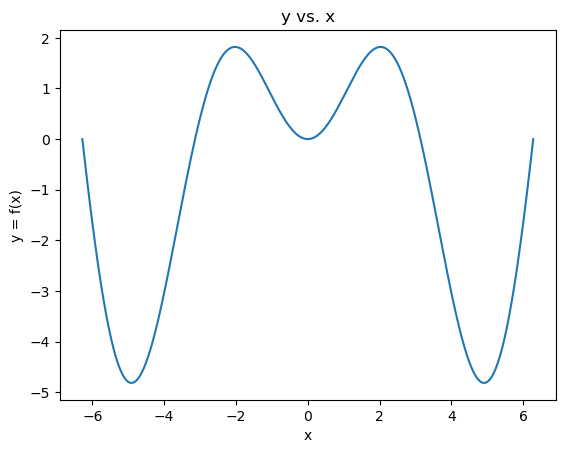

In [20]:
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi,2*np.pi,1000)
y = x*np.sin(x)

plt.plot(x,y)
plt.title("y vs. x")
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.show()

In [21]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [22]:
b = a.reshape(3, 2)
b

array([[0, 1],
       [2, 3],
       [4, 5]])

## Array Operations

When performing operations with arrays, note array dimensions!

In [23]:
x = (np.arange(4)).reshape(2,2)
y = (np.arange(4,8)).reshape(2,2)
print(x)
print(y)

[[0 1]
 [2 3]]
[[4 5]
 [6 7]]


In [24]:
x+y

array([[ 4,  6],
       [ 8, 10]])

In [25]:
x*y

array([[ 0,  5],
       [12, 21]])

In [26]:
x/y

array([[0.        , 0.2       ],
       [0.33333333, 0.42857143]])

In [27]:
print(x.shape)
print(x)

(2, 2)
[[0 1]
 [2 3]]


In [28]:
r = np.array([1,2])
r.shape

(2,)

The above is equivalent to a 1x2 array.

In [29]:
x+r

array([[1, 3],
       [3, 5]])

In [30]:
r = np.array([[1,2]])
r.shape

(1, 2)

In [31]:
x+r

array([[1, 3],
       [3, 5]])

In [32]:
r = np.array([[1],[2]])
r.shape

(2, 1)

In [33]:
x+r

array([[1, 2],
       [4, 5]])

#### What if I want to make an array such that:
A = $\begin{bmatrix} a_{11} & a_{12}\\ a_{21} & a_{22} \end{bmatrix}$, B = $\begin{bmatrix}
b_{11} & b_{12}\\
b_{21} & b_{22}
\end{bmatrix}$, and C = $\begin{bmatrix}
a_{11}B & a_{12}B\\
a_{21}B & a_{22}B
\end{bmatrix}$


In [34]:
x = (np.arange(4)).reshape(2,2)
y = (np.arange(4,8)).reshape(2,2)
ref = x[:,:,None,None]

In [35]:
ref.shape

(2, 2, 1, 1)

In [36]:
ref

array([[[[0]],

        [[1]]],


       [[[2]],

        [[3]]]])

In [37]:
ref*y

array([[[[ 0,  0],
         [ 0,  0]],

        [[ 4,  5],
         [ 6,  7]]],


       [[[ 8, 10],
         [12, 14]],

        [[12, 15],
         [18, 21]]]])

Slicing arrays with "None" creates a new axis of length 1. This allows operations between arrays of different dimensions, or customized array multiplications like the above.

E.g: $f(x) = sin(x) + sin(\alpha)cos(\alpha)$. One might consider $\alpha$ to be a scalar. However, if we allow $\alpha$ to vary, we've constructed a new 2 variable function:
$$f(x,\alpha) = sin(x) + sin(\alpha)cos(\alpha)$$

In [38]:
x = np.linspace(0, 2*np.pi,1000)
a = np.pi
y = np.sin(x)+np.sin(a)*np.cos(a)

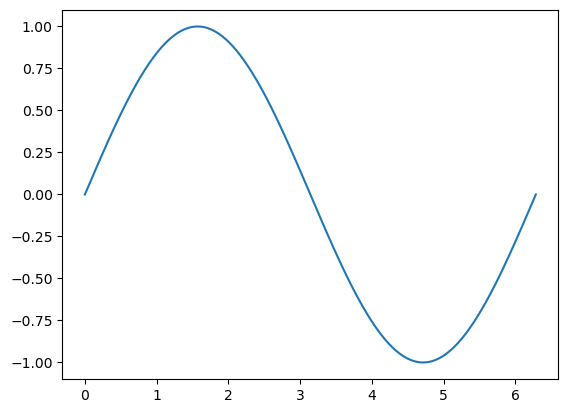

In [39]:
plt.plot(x,y)
plt.show()

In [40]:
x = np.linspace(0, 2*np.pi,1000)
a = np.linspace(0, 2*np.pi,1000)
y = np.sin(x)[:,None]+np.sin(a)*np.cos(a) #Essentially, 1000x1 times (1000,) = 1x1000. So output is  1000x1000.
y.shape

(1000, 1000)

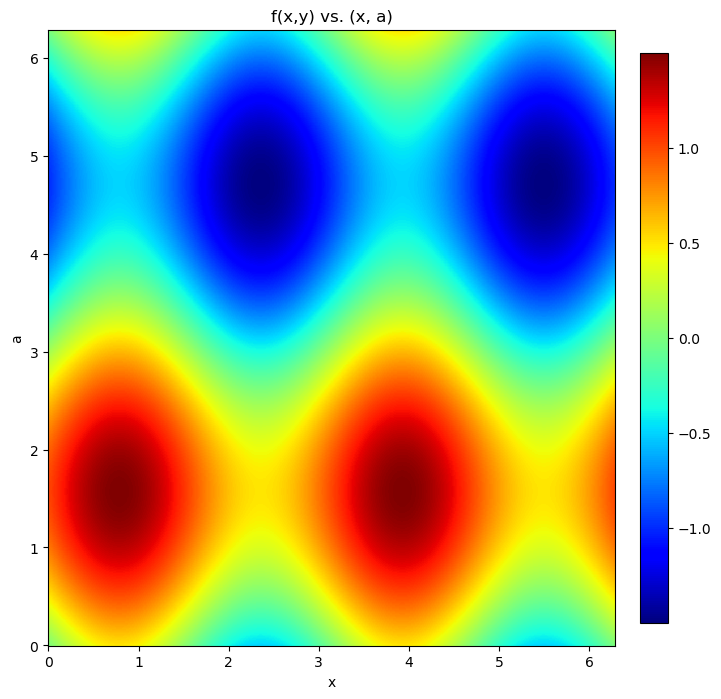

In [41]:
plt.figure(figsize=(8,8))
plt.pcolormesh(x,a, y
               ,  shading = 'auto', cmap = 'jet')
plt.title("f(x,y) vs. (x, a)")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel("x")
plt.ylabel("a")
plt.show()

## Check $\sum_{k=1}^{n} k = \frac{n(n+1)}{2}$

In [42]:
k = np.arange(1,1001)
n = k.size
print(n)
print(k.sum())
print(n*(n+1)/2)

1000
500500
500500.0


## Linear Algebra

### Matrix Multiplication

In [43]:
A = np.array([[2, 4], [3,5]])
b = np.array([1,2])
A@b

array([10, 13])

In [44]:
B = np.array([[3,5],[1,2]])
A@B

array([[10, 18],
       [14, 25]])

### Transpose

In [45]:
A = np.array([[2, 4], [3,5]])
A.T

array([[2, 3],
       [4, 5]])

### Solve Ax = b

### $$2x+4y = 1 \\ 3x+5y = 2$$

In [46]:
A = np.array([[2, 4], [3,5]])
b = np.array([1,2])
x = np.linalg.solve(A,b)
x

array([ 1.5, -0.5])

### Find eigenvectors/eigenvalues

In [47]:
A = np.array([[2, 0], [0,5]])
w, v = np.linalg.eig(A)
w

array([2., 5.])

In [48]:
v #Note, columns are eigenvectors, not rows.

array([[1., 0.],
       [0., 1.]])

In [49]:
v[:,0]

array([1., 0.])

## Calculus

## Find $\frac{d}{dx}(x^2+1)$ numerically:

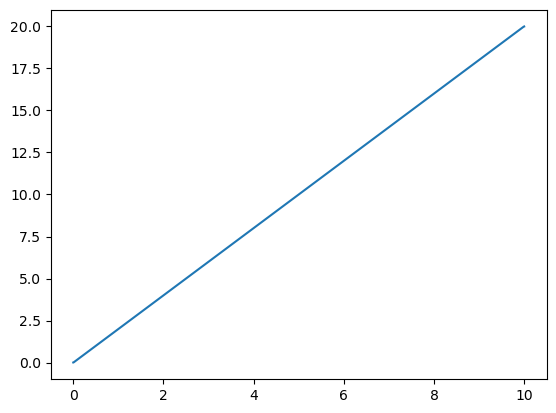

In [50]:
#Derivative: np.gradient(y(array), dx(step size)).

x = np.linspace(0,10,1000)
dx = x[1]-x[0]
y = x**2 + 1
dydx = np.gradient(y, dx)

plt.plot(x, dydx)
plt.show()

## Find $\int_{-1}^1 x dx$ numerically:

In [51]:
#Integral: np.trapz(y(array), x = x_array).
x = np.linspace(-1,1,10000)
y = x
np.trapz(y,x=x)


0.0

## Plot $\int_{0}^x 2x dx$ numerically:

In [52]:
x = np.linspace(0,3,10000)
N = 100
res = int(x.size/N)
y_list = np.empty(res)

for i in range(res):
    x1 = x[0:(i+1)*N]
    ys = np.trapz(2*x1, x = x1)
    y_list[i] = ys
    

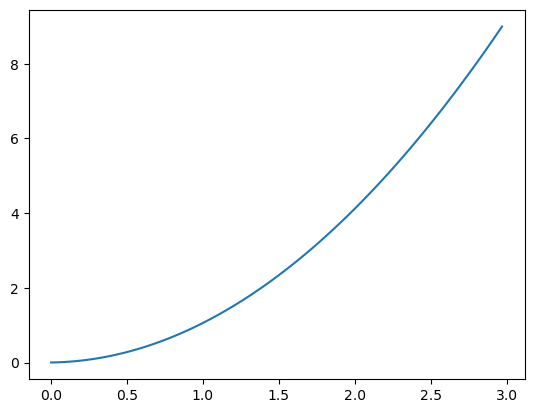

In [53]:
plt.plot(x[0:-1:N],y_list)
plt.show()

## Differential Equations

## Solve $\frac{dy}{dt} = ry(M-y)$

In [54]:
from scipy.integrate import odeint

In [55]:
#Diffeq on function below:
y0 = 2
M = 100
r = 0.5
def dydt(y,t):
    return r*y*(M-y)


In [56]:
#ODEs: odeint(func, y0(scalar), t(array)).
t = np.linspace(0,1,1000)
sol = odeint(dydt, y0,t)

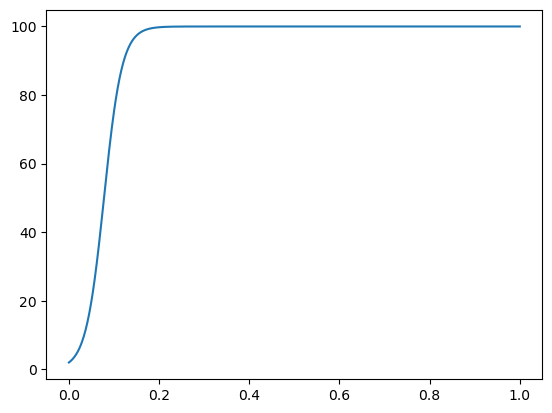

In [57]:
plt.plot(t,sol)
plt.show()

## Solve $\theta''=sin\theta$

### SciPy can't solve 2nd-order ODEs, so you have to turn this problem into a 1st-order problem. i.e:
### define $\omega = \frac{d\theta}{dt}$; then:
### $$\frac{d\omega}{dt} = sin\theta\\ \frac{d\theta}{dt} = \omega$$

### Let S = ($\theta,$ $\omega$):

In [58]:
def dSdt(S,t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0 = np.pi/2
omega0 = 0
S0 = (theta0,omega0)

In [59]:
t = np.linspace(0,20,1000)
sol = odeint(dSdt, S0,t)

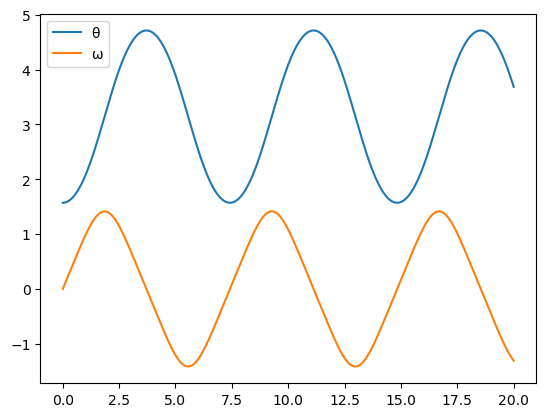

In [60]:
plt.plot(t,sol)
plt.legend(["θ","ω"])
plt.show()

## Misc. Examples

## Make a simple root-solver:

Newton's method for finding roots:
Given initial guess $x_0$: 
### $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In [61]:
def roots(func, x0, tol = 1e-6, h = 1e-3): #tol is the max error allowed, h is the step-size for derivative calculations.
    error = 1
    x = x0
    while error>tol:
        deriv = (f(x+h)-f(x))/h
        xref = x
        x = x-func(x)/deriv
        error = np.abs(xref-x)
    return x

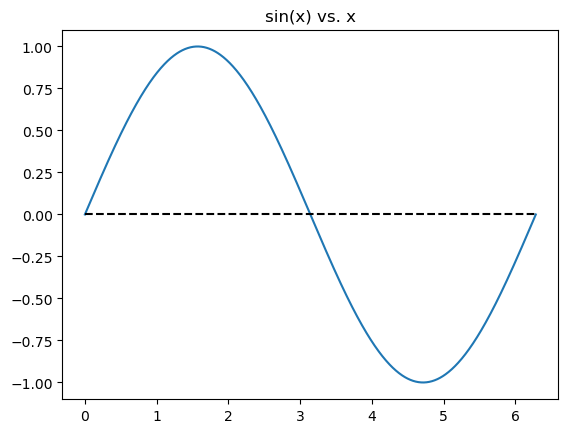

In [62]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(x,np.sin(x))
plt.title("sin(x) vs. x")
plt.plot(x, np.zeros(x.size), "k--")
plt.show()

In [63]:
def f(x):
    return np.sin(x)

In [64]:
roots(f,1)

-1.989066153334394e-18

In [65]:
roots(f,4)

3.141592653589845

In [66]:
# #round(roots(f,1))
# begin = time.time()
# roots(f,1)
# end = time.time()
# print("{}".format(end-begin))

### This is deceptively powerful; if one wants to solve $f(x) = g(x)$, instead of solving the equation analytically for a given x:
### $$f(x) = g(x) \Rightarrow f(x)-g(x) = 0$$
### and one can solve for the roots of $f(x) - g(x)$ to find the points of intersection.

### Solve for x such that: $x = sin(x)$.

In [67]:
def r(x):
    return x-np.sin(x)

In [68]:
roots(r,1)

0.01816907728816747

In [69]:
np.sin(roots(r,1))

0.01816807765605689

### The 1D heat equation is given by:
### $$\frac{\partial T}{\partial t} = \alpha \frac{\partial ^2 T}{\partial x^2}$$



### One can discretize this PDE to solve for the temperature at the next time step: 
### $$T_i^{n+1} = T_i^n+\alpha \frac{\Delta t}{\Delta x^2} (T_{i+1}^n-2T_i^n+T_{i-1}^n)$$

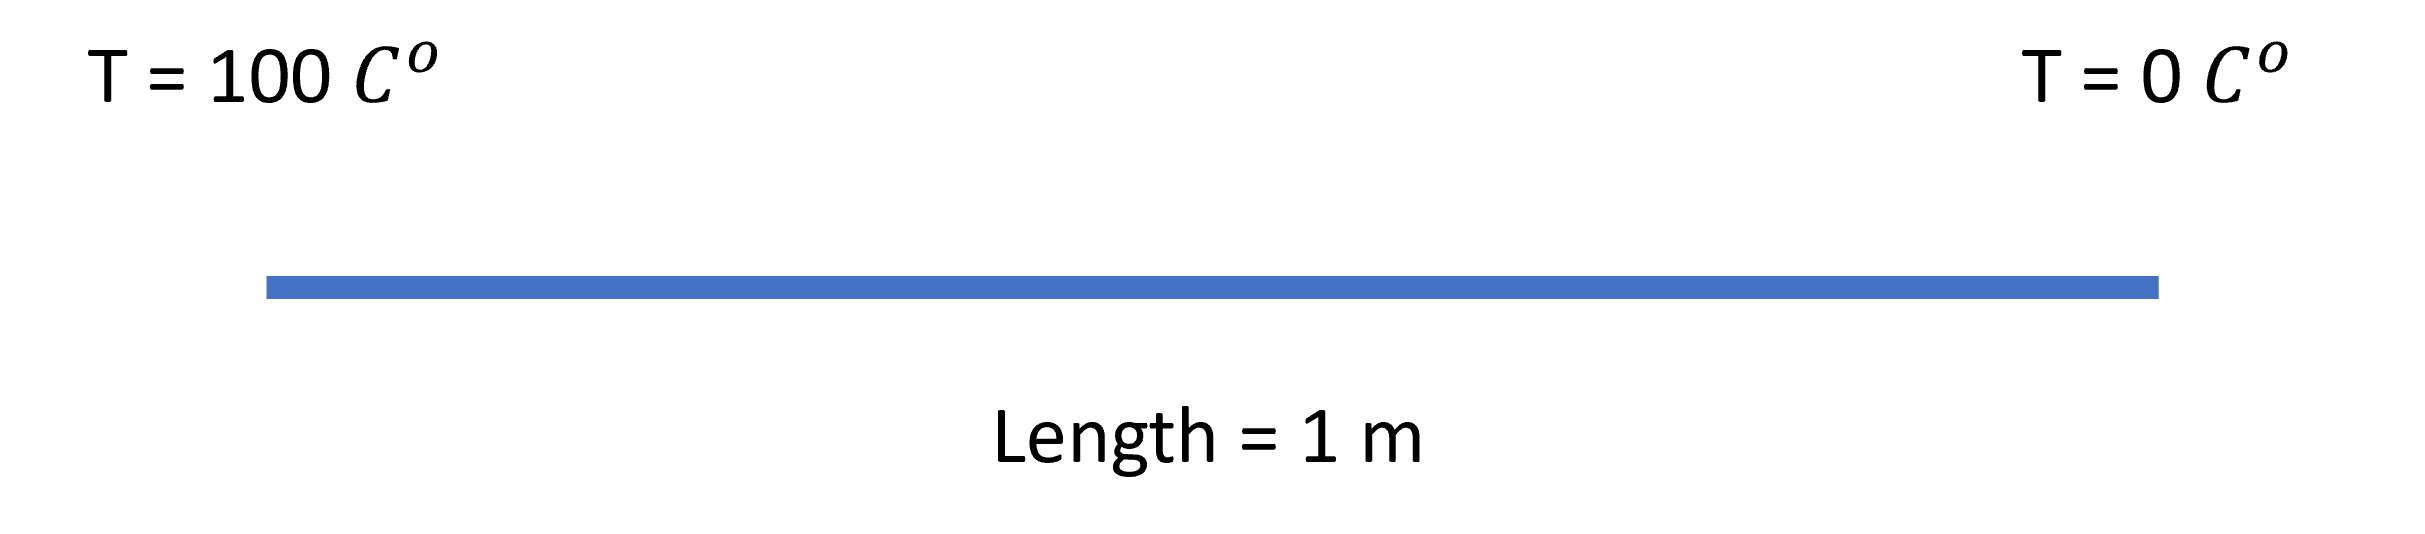

In [70]:
T0 = 100
L = 1
Nx = 101
dx = L/(Nx-1)
x = np.linspace(0,1,Nx)
alpha = 1e-3
Nt = 101
sigma = 0.50 #Equals α*Δt/Δx^2
dt = sigma * dx**2 / alpha  

def temp(T0, t_steps, delta_t, delta_x, alpha):
    T = np.zeros(Nx)
    T[0] = T0
    sigma = alpha * delta_t / delta_x**2
    for n in range(t_steps):
        T[1:-1] = (T[1:-1] +
                   sigma * (T[2:] - 2.0 * T[1:-1] + T[:-2]))
    return T

T = temp(T0, Nt, dt, dx, alpha)

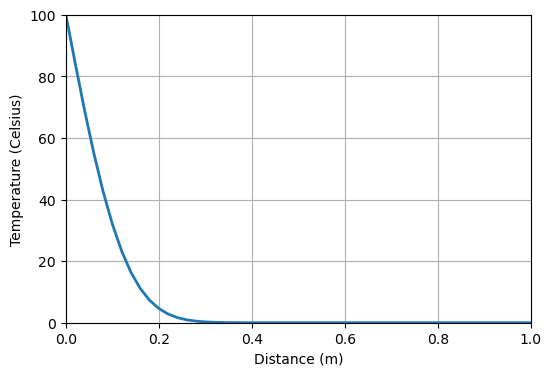

In [71]:
# Plot the temperature along the rod.
plt.figure(figsize=(6.0, 4.0))
plt.xlabel('Distance (m)')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.plot(x, T, color='C0', linestyle='-', linewidth=2)
plt.xlim(0.0, L)
plt.ylim(0.0, 100.0);